In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)
import collections
from io import StringIO

import numpy as np
import pandas as pd
import pydotplus  # pip install pydotplus
import seaborn as sns
from ipywidgets import Image
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
# Create dataframe with dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis=1)
    out.drop(feature_list, axis=1, inplace=True)
    return out


# Some feature values are present in train and absent in test and vice-versa.
def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [3]:
features = ["Looks", "Alcoholic_beverage", "Eloquence", "Money_spent"]

In [4]:
df_train = {}
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]
df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]
df_train["Will_go"] = LabelEncoder().fit_transform(["+", "-", "+", "-", "-", "+", "+"])

df_train = create_df(df_train, features)
df_train

Will_go  Looks_handsome  Looks_repulsive  Alcoholic_beverage_no  \
0        0               1                0                      0   
1        1               1                0                      0   
2        0               1                0                      1   
3        1               0                1                      1   
4        1               0                1                      0   
5        0               0                1                      0   
6        0               1                0                      0   

   Alcoholic_beverage_yes  Eloquence_average  Eloquence_high  Eloquence_low  \
0                       1                  0               1              0   
1                       1                  0               0              1   
2                       0                  1               0              0   
3                       0                  1               0              0   
4                       1                  0               0              1   
5                       1                  0               1              0   
6                       1                  1               0              0   

   Money_spent_little  Money_spent_lots  
0                   0                 1  
1                   1                 0  
2                   0                 1  
3                   1                 0  
4                   0                 1  
5                   0                 1  
6                   0                 1

In [5]:
df_test = {}
df_test["Looks"] = ["handsome", "handsome", "repulsive"]
df_test["Alcoholic_beverage"] = ["no", "yes", "yes"]
df_test["Eloquence"] = ["average", "high", "average"]
df_test["Money_spent"] = ["lots", "little", "lots"]
df_test = create_df(df_test, features)
df_test

Looks_handsome  Looks_repulsive  Alcoholic_beverage_no  \
0               1                0                      1   
1               1                0                      0   
2               0                1                      0   

   Alcoholic_beverage_yes  Eloquence_average  Eloquence_high  \
0                       0                  1               0   
1                       1                  0               1   
2                       1                  1               0   

   Money_spent_little  Money_spent_lots  
0                   0                 1  
1                   1                 0  
2                   0                 1

In [6]:
# Some feature values are present in train and absent in test and vice-versa.
y = df_train["Will_go"]
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

Money_spent_lots  Looks_handsome  Alcoholic_beverage_no  Eloquence_high  \
0                 1               1                      0               1   
1                 0               1                      0               0   
2                 1               1                      1               0   
3                 0               0                      1               0   
4                 1               0                      0               0   
5                 1               0                      0               1   
6                 1               1                      0               0   

   Eloquence_average  Alcoholic_beverage_yes  Looks_repulsive  \
0                  0                       1                0   
1                  0                       1                0   
2                  1                       0                0   
3                  1                       0                1   
4                  0                       1                1   
5                  0                       1                1   
6                  1                       1                0   

   Money_spent_little  
0                   0  
1                   1  
2                   0  
3                   1  
4                   0  
5                   0  
6                   0

In [7]:
df_test

Money_spent_lots  Looks_handsome  Alcoholic_beverage_no  Eloquence_high  \
0                 1               1                      1               0   
1                 0               1                      0               1   
2                 1               0                      0               0   

   Eloquence_average  Alcoholic_beverage_yes  Looks_repulsive  \
0                  1                       0                0   
1                  0                       1                0   
2                  1                       1                1   

   Money_spent_little  
0                   0  
1                   1  
2                   0

In [8]:
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

# training the tree
clf_tree.fit(df_train, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

In [9]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [10]:
tree_graph_to_png(
    tree=clf_tree,
    feature_names=["Alcoholic_beverage_no", "Alcoholic_beverage_yes", "Eloquence_average", "Looks_handsome", "Money_spent_lots", "Eloquence_high", "Looks_repulsive", "Money_spent_little"],
    png_file_to_save="topic3_toy_example.png",
)

Answer task 3.1 - 0.985

# Task 3.2

In [11]:
df_train2 = df_train.drop(columns=["Alcoholic_beverage_no", "Alcoholic_beverage_yes", "Eloquence_average", "Money_spent_lots", "Eloquence_high", "Looks_repulsive", "Money_spent_little"])

clf_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

# training the tree
clf_tree2.fit(df_train2, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

In [12]:
tree_graph_to_png(
    tree=clf_tree2,
    feature_names=["Looks_handsome"],
    png_file_to_save="topic3_toy_example_by_handsome.png",
)

S1 = 0.811
S2 = 0.918
IG = 0.128

# Example - Part 2 

In [13]:
balls = [1 for i in range(9)] + [0 for i in range(11)]

In [14]:
# two groups
balls_left = [1 for i in range(8)] + [0 for i in range(5)]  # 8 blue and 5 yellow
balls_right = [1 for i in range(1)] + [0 for i in range(6)]  # 1 blue and 6 yellow

In [15]:
def entropy(a_list):
    entropy = 0
            
    array = np.array(a_list)
    all_states = len(array)
    unique_states, unique_states_counts = np.unique(array, return_counts=True)
    num_unique_states = len(unique_states)
    
    for state in unique_states_counts:
        p = state / all_states
        entropy += (-1) * p * np.log2(p)
        
    return entropy

In [16]:
print(entropy(balls))  # 9 blue и 11 yellow
print(entropy(balls_left))  # 8 blue и 5 yellow
print(entropy(balls_right))  # 1 blue и 6 yellow
print(entropy([1, 2, 3, 4, 5, 6]))  # entropy of a fair 6-sided die

0.9927744539878083
0.9612366047228759
0.5916727785823275
2.584962500721156


# Task 3.3

In [17]:
print(entropy(balls_left))  # 8 blue и 5 yellow


0.9612366047228759


# Task 3.4

In [18]:
print(entropy([1, 2, 3, 4, 5, 6]))  # entropy of a fair 6-sided die

2.584962500721156


In [19]:
# information gain calculation
def information_gain(root, left, right):
    """ root - initial data, left and right - two partitions of initial data"""
    s0 = entropy(root)
    s1 = entropy(left)
    s2 = entropy(right)
    
    l0 = len(root)
    l1 = len(left)
    l2 = len(right)
    
    information_gain = s0 - (l1 / l0) * s1 - (l2 / l0) * s2
    
    return information_gain

# Task 3.5

In [20]:
information_gain(balls, balls_left, balls_right)

0.16088518841412436

# Part 3. The “Adult” dataset

In [21]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [22]:
data_train = pd.read_csv(DATA_PATH + "adult_train.csv", sep=";")

In [23]:
data_train.tail()

Age      Workclass  fnlwgt    Education  Education_Num  \
32556   27        Private  257302   Assoc-acdm             12   
32557   40        Private  154374      HS-grad              9   
32558   58        Private  151910      HS-grad              9   
32559   22        Private  201490      HS-grad              9   
32560   52   Self-emp-inc  287927      HS-grad              9   

            Martial_Status          Occupation Relationship    Race      Sex  \
32556   Married-civ-spouse        Tech-support         Wife   White   Female   
32557   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32558              Widowed        Adm-clerical    Unmarried   White   Female   
32559        Never-married        Adm-clerical    Own-child   White     Male   
32560   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_Gain  Capital_Loss  Hours_per_week         Country  Target  
32556             0             0              38   United-States   <=50K  
32557             0             0              40   United-States    >50K  
32558             0             0              40   United-States   <=50K  
32559             0             0              20   United-States   <=50K  
32560         15024             0              40   United-States    >50K

In [24]:
data_test = pd.read_csv(DATA_PATH + "adult_test.csv", sep=";")

In [25]:
data_test.tail()

Age      Workclass    fnlwgt   Education  Education_Num  \
16277  39        Private  215419.0   Bachelors           13.0   
16278  64            NaN  321403.0     HS-grad            9.0   
16279  38        Private  374983.0   Bachelors           13.0   
16280  44        Private   83891.0   Bachelors           13.0   
16281  35   Self-emp-inc  182148.0   Bachelors           13.0   

            Martial_Status        Occupation     Relationship  \
16277             Divorced    Prof-specialty    Not-in-family   
16278              Widowed               NaN   Other-relative   
16279   Married-civ-spouse    Prof-specialty          Husband   
16280             Divorced      Adm-clerical        Own-child   
16281   Married-civ-spouse   Exec-managerial          Husband   

                      Race      Sex  Capital_Gain  Capital_Loss  \
16277                White   Female           0.0           0.0   
16278                Black     Male           0.0           0.0   
16279                White     Male           0.0           0.0   
16280   Asian-Pac-Islander     Male        5455.0           0.0   
16281                White     Male           0.0           0.0   

       Hours_per_week         Country   Target  
16277            36.0   United-States   <=50K.  
16278            40.0   United-States   <=50K.  
16279            50.0   United-States   <=50K.  
16280            40.0   United-States   <=50K.  
16281            60.0   United-States    >50K.

In [26]:
# necessary to remove rows with incorrect labels in test dataset
data_test = data_test[
    (data_test["Target"] == " >50K.") | (data_test["Target"] == " <=50K.")
]

# encode target variable as integer
data_train.loc[data_train["Target"] == " <=50K", "Target"] = 0
data_train.loc[data_train["Target"] == " >50K", "Target"] = 1

data_test.loc[data_test["Target"] == " <=50K.", "Target"] = 0
data_test.loc[data_test["Target"] == " >50K.", "Target"] = 1

In [27]:
data_test.describe(include="all").T

count unique                  top     freq           mean  \
Age               16281     73                   35      461            NaN   
Workclass         15318      8              Private    11210            NaN   
fnlwgt          16281.0    NaN                  NaN      NaN  189435.677784   
Education         16281     16              HS-grad     5283            NaN   
Education_Num   16281.0    NaN                  NaN      NaN      10.072907   
Martial_Status    16281      7   Married-civ-spouse     7403            NaN   
Occupation        15315     14       Prof-specialty     2032            NaN   
Relationship      16281      6              Husband     6523            NaN   
Race              16281      5                White    13946            NaN   
Sex               16281      2                 Male    10860            NaN   
Capital_Gain    16281.0    NaN                  NaN      NaN    1081.905104   
Capital_Loss    16281.0    NaN                  NaN      NaN      87.899269   
Hours_per_week  16281.0    NaN                  NaN      NaN      40.392236   
Country           16007     40        United-States    14662            NaN   
Target          16281.0    2.0                  0.0  12435.0            NaN   

                          std      min       25%       50%       75%  \
Age                       NaN      NaN       NaN       NaN       NaN   
Workclass                 NaN      NaN       NaN       NaN       NaN   
fnlwgt          105714.907671  13492.0  116736.0  177831.0  238384.0   
Education                 NaN      NaN       NaN       NaN       NaN   
Education_Num        2.567545      1.0       9.0      10.0      12.0   
Martial_Status            NaN      NaN       NaN       NaN       NaN   
Occupation                NaN      NaN       NaN       NaN       NaN   
Relationship              NaN      NaN       NaN       NaN       NaN   
Race                      NaN      NaN       NaN       NaN       NaN   
Sex                       NaN      NaN       NaN       NaN       NaN   
Capital_Gain      7583.935968      0.0       0.0       0.0       0.0   
Capital_Loss       403.105286      0.0       0.0       0.0       0.0   
Hours_per_week      12.479332      1.0      40.0      40.0      45.0   
Country                   NaN      NaN       NaN       NaN       NaN   
Target                    NaN      NaN       NaN       NaN       NaN   

                      max  
Age                   NaN  
Workclass             NaN  
fnlwgt          1490400.0  
Education             NaN  
Education_Num        16.0  
Martial_Status        NaN  
Occupation            NaN  
Relationship          NaN  
Race                  NaN  
Sex                   NaN  
Capital_Gain      99999.0  
Capital_Loss       3770.0  
Hours_per_week       99.0  
Country               NaN  
Target                NaN

In [28]:
data_train["Target"].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

In [29]:
data_test["Target"].value_counts()

0    12435
1     3846
Name: Target, dtype: int64

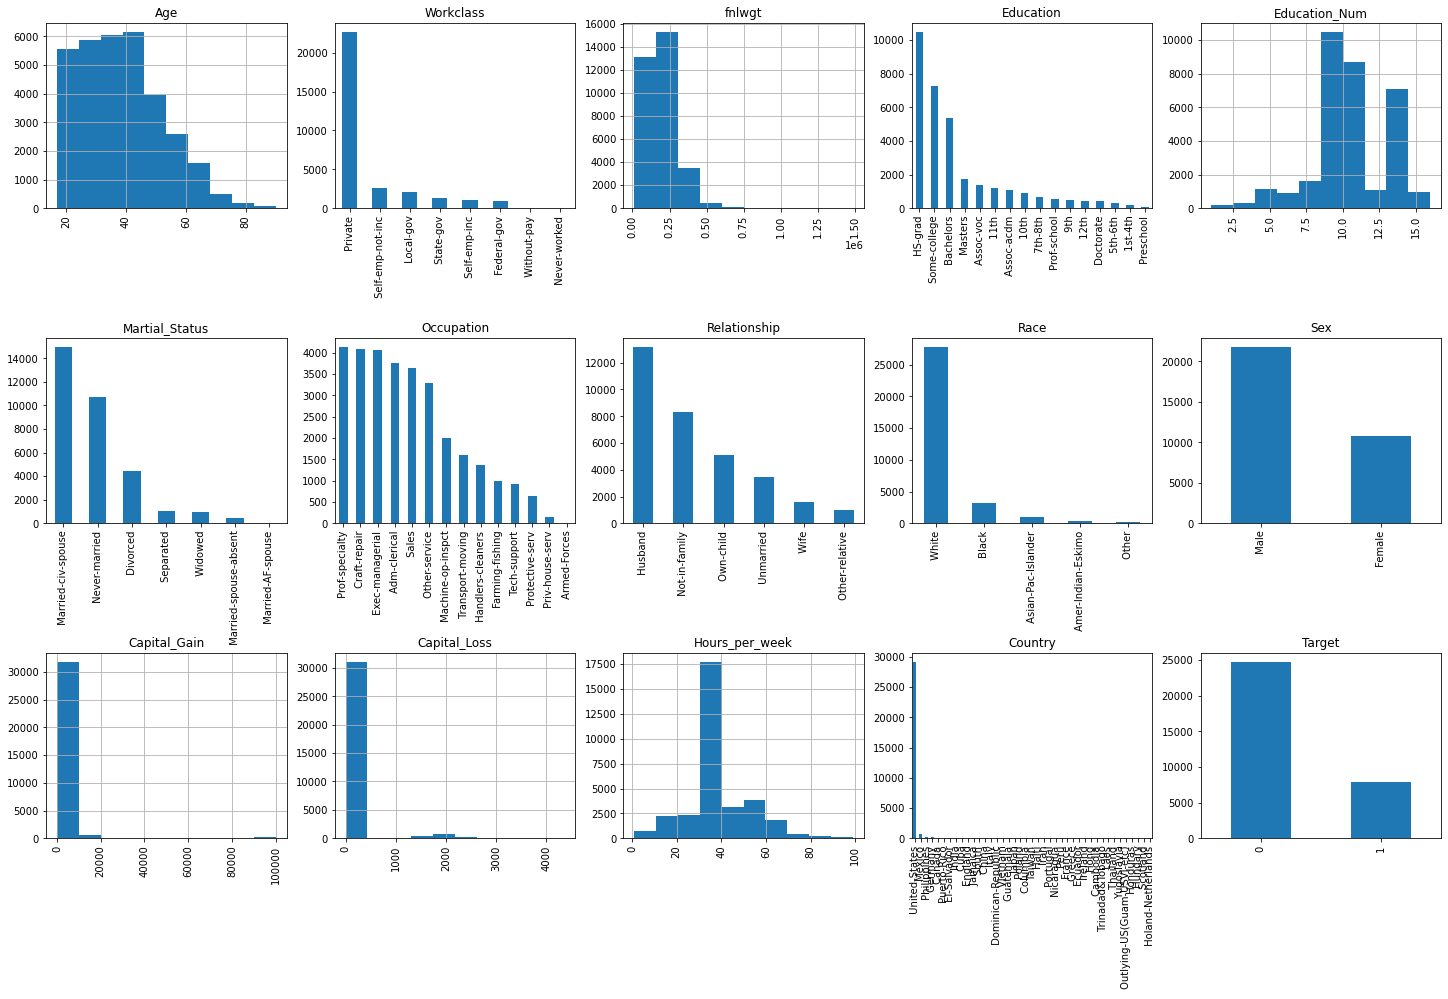

In [30]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = int(data_train.shape[1] / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2);

In [31]:
data_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [32]:
data_test.dtypes

Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target             object
dtype: object

In [33]:
data_test["Age"] = data_test["Age"].astype(int)

In [34]:
data_test["fnlwgt"] = data_test["fnlwgt"].astype(int)
data_test["Education_Num"] = data_test["Education_Num"].astype(int)
data_test["Capital_Gain"] = data_test["Capital_Gain"].astype(int)
data_test["Capital_Loss"] = data_test["Capital_Loss"].astype(int)
data_test["Hours_per_week"] = data_test["Hours_per_week"].astype(int)

In [35]:
# choose categorical and continuous features from data

categorical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name == "object"
]
numerical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


In [36]:
# we see some missing values
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [37]:
# fill missing data

for c in categorical_columns:
    data_train[c].fillna(data_train[c].mode()[0], inplace=True)
    data_test[c].fillna(data_train[c].mode()[0], inplace=True)

for c in numerical_columns:
    data_train[c].fillna(data_train[c].median(), inplace=True)
    data_test[c].fillna(data_train[c].median(), inplace=True)

In [38]:
# no more missing values
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [39]:
data_train = pd.concat(
    [data_train[numerical_columns], pd.get_dummies(data_train[categorical_columns])],
    axis=1,
)

data_test = pd.concat(
    [data_test[numerical_columns], pd.get_dummies(data_test[categorical_columns])],
    axis=1,
)

In [40]:
set(data_train.columns) - set(data_test.columns)

{'Country_ Holand-Netherlands'}

In [41]:
data_train.shape, data_test.shape

((32561, 106), (16281, 105))

In [42]:
data_test["Country_ Holand-Netherlands"] = 0

In [43]:
set(data_train.columns) - set(data_test.columns)

set()

In [44]:
data_train.head(4)

Age  fnlwgt  Education_Num  Capital_Gain  Capital_Loss  Hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   

   Target  Workclass_ Federal-gov  Workclass_ Local-gov  \
0       0                       0                     0   
1       0                       0                     0   
2       0                       0                     0   
3       0                       0                     0   

   Workclass_ Never-worked  ...  Country_ Portugal  Country_ Puerto-Rico  \
0                        0  ...                  0                     0   
1                        0  ...                  0                     0   
2                        0  ...                  0                     0   
3                        0  ...                  0                     0   

   Country_ Scotland  Country_ South  Country_ Taiwan  Country_ Thailand  \
0                  0               0                0                  0   
1                  0               0                0                  0   
2                  0               0                0                  0   
3                  0               0                0                  0   

   Country_ Trinadad&Tobago  Country_ United-States  Country_ Vietnam  \
0                         0                       1                 0   
1                         0                       1                 0   
2                         0                       1                 0   
3                         0                       1                 0   

   Country_ Yugoslavia  
0                    0  
1                    0  
2                    0  
3                    0  

[4 rows x 106 columns]

In [45]:
data_test.head(4)

Age  fnlwgt  Education_Num  Capital_Gain  Capital_Loss  Hours_per_week  \
1   25  226802              7             0             0              40   
2   38   89814              9             0             0              50   
3   28  336951             12             0             0              40   
4   44  160323             10          7688             0              40   

   Target  Workclass_ Federal-gov  Workclass_ Local-gov  \
1       0                       0                     0   
2       0                       0                     0   
3       1                       0                     1   
4       1                       0                     0   

   Workclass_ Never-worked  ...  Country_ Puerto-Rico  Country_ Scotland  \
1                        0  ...                     0                  0   
2                        0  ...                     0                  0   
3                        0  ...                     0                  0   
4                        0  ...                     0                  0   

   Country_ South  Country_ Taiwan  Country_ Thailand  \
1               0                0                  0   
2               0                0                  0   
3               0                0                  0   
4               0                0                  0   

   Country_ Trinadad&Tobago  Country_ United-States  Country_ Vietnam  \
1                         0                       1                 0   
2                         0                       1                 0   
3                         0                       1                 0   
4                         0                       1                 0   

   Country_ Yugoslavia  Country_ Holand-Netherlands  
1                    0                            0  
2                    0                            0  
3                    0                            0  
4                    0                            0  

[4 rows x 106 columns]

In [46]:
X_train = data_train.drop(["Target"], axis=1)
y_train = data_train["Target"]

X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

In [47]:
X_train.head(3)

Age  fnlwgt  Education_Num  Capital_Gain  Capital_Loss  Hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   

   Workclass_ Federal-gov  Workclass_ Local-gov  Workclass_ Never-worked  \
0                       0                     0                        0   
1                       0                     0                        0   
2                       0                     0                        0   

   Workclass_ Private  ...  Country_ Portugal  Country_ Puerto-Rico  \
0                   0  ...                  0                     0   
1                   0  ...                  0                     0   
2                   1  ...                  0                     0   

   Country_ Scotland  Country_ South  Country_ Taiwan  Country_ Thailand  \
0                  0               0                0                  0   
1                  0               0                0                  0   
2                  0               0                0                  0   

   Country_ Trinadad&Tobago  Country_ United-States  Country_ Vietnam  \
0                         0                       1                 0   
1                         0                       1                 0   
2                         0                       1                 0   

   Country_ Yugoslavia  
0                    0  
1                    0  
2                    0  

[3 rows x 105 columns]

In [48]:
X_test.head(3)

Age  fnlwgt  Education_Num  Capital_Gain  Capital_Loss  Hours_per_week  \
1   25  226802              7             0             0              40   
2   38   89814              9             0             0              50   
3   28  336951             12             0             0              40   

   Workclass_ Federal-gov  Workclass_ Local-gov  Workclass_ Never-worked  \
1                       0                     0                        0   
2                       0                     0                        0   
3                       0                     1                        0   

   Workclass_ Private  ...  Country_ Puerto-Rico  Country_ Scotland  \
1                   1  ...                     0                  0   
2                   1  ...                     0                  0   
3                   0  ...                     0                  0   

   Country_ South  Country_ Taiwan  Country_ Thailand  \
1               0                0                  0   
2               0                0                  0   
3               0                0                  0   

   Country_ Trinadad&Tobago  Country_ United-States  Country_ Vietnam  \
1                         0                       1                 0   
2                         0                       1                 0   
3                         0                       1                 0   

   Country_ Yugoslavia  Country_ Holand-Netherlands  
1                    0                            0  
2                    0                            0  
3                    0                            0  

[3 rows x 105 columns]

# Task 3.6

In [49]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=17)

# training the tree
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [50]:
import warnings
warnings.filterwarnings('ignore')

tree_prediction = tree.predict(X_test)

In [51]:
accuracy_score(y_test, tree_prediction) 

0.8447884036607088

In [52]:
tree_graph_to_png(
    tree=tree,
    feature_names=list(X_train.columns),
    png_file_to_save="topic3_adult_example.png",
)

# Task 3.7

In [53]:
tree_params = {"max_depth": range(2, 11)}

locally_best_tree = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

locally_best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=17),
             n_jobs=-1, param_grid={'max_depth': range(2, 11)}, verbose=True)

In [54]:
locally_best_tree.best_params_

{'max_depth': 9}

In [55]:
# creating a tree with the best depth
tuned_tree = DecisionTreeClassifier(criterion="gini", max_depth=9, random_state=17)

# training the tree 
tuned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=17)

In [56]:
# making a prediction using the decision tree
tuned_tree_prediction = tuned_tree.predict(X_test)

In [57]:
# estimating accuracy of the decision tree
accuracy_score(y_test, tuned_tree_prediction)

0.847798046803022

# Random Forest

In [58]:
# creating a random forest (100 trees)
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)

# training the forest 
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=17)

In [59]:
# making a prediction using random forest
rf_prediction = rf.predict(X_test)

In [60]:
# estimating accuracy of the random forest
accuracy_score(y_test, rf_prediction) 

0.8585467723112831

## Tuned random forest

In [61]:
forest_params = {'max_depth': range(10, 21), 'max_features': range(5, 105, 20)}

locally_best_forest = GridSearchCV(rf, forest_params, cv=5, n_jobs=-1, verbose=True)

locally_best_forest.fit(X_train, y_train)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 21),
                         'max_features': range(5, 105, 20)},
             verbose=True)

In [62]:
locally_best_forest.best_params_

{'max_depth': 19, 'max_features': 25}

In [63]:
tuned_forest = RandomForestClassifier(n_estimators=100, max_depth=19, max_features=25, n_jobs=-1, random_state=17)

tuned_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, max_features=25, n_jobs=-1,
                       random_state=17)

In [64]:
tuned_forest_prediction = tuned_forest.predict(X_test)

In [65]:
# estimating accuracy of the tuned random forest
accuracy_score(y_test, tuned_forest_prediction) 

0.8628462625145875

# K Nearest Neighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# creating a model using knn algorithm
knn = KNeighborsClassifier(n_neighbors=10)

# training the model using knn algorithm
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [67]:
# making a prediction using knn algorithm
knn_prediction = knn.predict(X_test)

In [68]:
# estimating accuracy of the knn algorithm
accuracy_score(y_test, knn_prediction)  

0.7978011178674529

## Tuned KNN

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(1, 10)}

locally_best_knn = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

locally_best_knn.fit(X_train, y_train)

locally_best_knn.best_params_, locally_best_knn.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'knn__n_neighbors': 8}, 0.8275546006833432)

In [71]:
tuned_knn = KNeighborsClassifier(n_neighbors=8)

tuned_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [72]:
tuned_knn_prediction = tuned_knn.predict(X_test)

In [73]:
# estimating accuracy of the tuned knn algorithm
accuracy_score(y_test, tuned_knn_prediction)

0.7956513727658007